# Load the Dataset
In your Databricks notebook, you can load the dataset using the following Python code:

In [ ]:
import pandas as pd

# Load the dataset (update the path as needed)
file_path = 'icc_wc_23_bat.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Selecting numerical columns for PCA
numerical_columns = ['runs', 'balls', 'minutes', '4s', '6s', 'strike_rate']
data_numerical = data[numerical_columns]

# Display the prepared data
print(data_numerical.head())


         player                  dismissal  runs  balls  minutes  4s  6s  \
0  Rohit Sharma               b Madushanka     4      2        2   1   0   
1  Shubman Gill      c Mendis b Madushanka    92     92      136  11   2   
2   Virat Kohli    c Nissanka b Madushanka    88     94      139  11   0   
3  Shreyas Iyer  c Theekshana b Madushanka    82     56       84   3   6   
4      KL Rahul      c Hemantha b Chameera    21     19       34   2   0   

   strike_rate   team   opponent  innings  match_id  
0       200.00  India  Sri Lanka        1         0  
1       100.00  India  Sri Lanka        1         0  
2        93.61  India  Sri Lanka        1         0  
3       146.42  India  Sri Lanka        1         0  
4       110.52  India  Sri Lanka        1         0  
player         0
dismissal      0
runs           0
balls          0
minutes        0
4s             0
6s             0
strike_rate    0
team           0
opponent       0
innings        0
match_id       0
dtype: int64
  

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_standardized = scaler.fit_transform(data_numerical)

# Convert the standardized data back to a DataFrame (optional, for better visualization)
data_standardized_df = pd.DataFrame(data_standardized, columns=numerical_columns)
print(data_standardized_df.head())

       runs     balls   minutes        4s        6s  strike_rate
0 -0.734610 -0.948445 -0.964786 -0.495460 -0.494032     2.208674
1  2.103998  2.202503  2.246420  2.682892  0.848447     0.324601
2  1.974971  2.272524  2.318313  2.682892 -0.494032     0.204208
3  1.781429  0.942124  1.000280  0.140211  3.533406     1.199187
4 -0.186242 -0.353266 -0.197931 -0.177624 -0.494032     0.522805


# PCA Implementation
Now that the data is standardized, you can apply PCA. The following code will help you implement PCA and visualize the results.

Explained Variance Ratio:
[0.70948986 0.16975256]


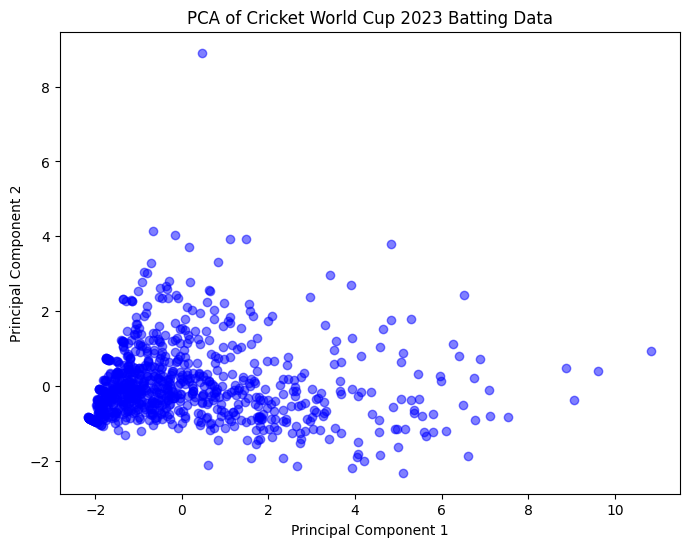

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
# You can specify the number of components (e.g., n_components=2)
pca = PCA(n_components=2)

# Fit and transform the standardized data
pca_data = pca.fit_transform(data_standardized)

# Convert the PCA data back to a DataFrame
pca_data_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_df['Principal Component 1'], pca_data_df['Principal Component 2'], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cricket World Cup 2023 Batting Data')
plt.show()


In [ ]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.70948986, 0.16975256])